## 02. infinite potential well

Laplacian operator
* Laplacian operator($\nabla^2$) in 3D
  - In the catesian coordinate, it is given by
    $$\nabla^2=\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2}+\frac{\partial^2}{\partial z^2} $$
* Laplacian operator($\nabla^2$) in 1D
  - In this case, it is reduced to
    $$\nabla^2=\frac{d^2}{dx^2} $$
  - It is simply the second order diferentiation
* The infinte potential well problem
  $$\frac{d^2\psi(x)}{dx^2}=-k^2\psi(x) $$
  - Therefore, solving the schrodinger equation is just to calcuate the eigenvalue/eigenfunction of the Laplacian operator
  - Analytic solutions(coskx and sinkx) are known.
  - Our goal is its discretization




eigen value problem
$$A\vec{x}=\lambda \vec{x} $$
H Hamiltonian operator - 2계 미분연산자, wave function, wave vector=eigenvector $\vec{x}=\psi(x) $, quantization energy=eigenvalue $\lambda$
$$H\psi(x)=E\psi(x)=-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}\psi(x)=-\frac{\hbar^2}{2m}\frac{\psi_{i+1}-2\psi_i+\psi_{i-1}}{\Delta x^2}=\lambda \psi(x) $$
수치해석적으로 고유값과 고유벡터를 얻는다. 2계 도함수을 표현하면
$$\frac{d^2\psi}{dx^2}\simeq\frac{\psi_{i+1}-2\psi_i+\psi_{i-1}}{\Delta x^2} $$

Analytical soultion

$$\psi(0)=\psi(a)=0 $$
$$\nabla^2\psi=-k^2\psi$$
$$\frac{d^2}{dx^2}\psi(x)=-\frac{2mE}{\hbar^2}\psi(x)=-k^2\psi(x) $$
-> eigen value 와 동일한 형태이다. 여기서 $-k^2 $이 고유값이 된다. 파동함수의 일반꼴로 sine 함수와 cosine 함수의 선형 결합이 될 것이다.


$$\psi(x)=A_1 coskx+A_2 sinkx $$
경계조건을 A1=0, x=a $\psi(x)=A_2 sinka=0 $ A2=0이면, 파동함수가 모든 점에서 0이 되게 하여 물리적으로 올바르지 않다. 따라서 적합한 조건은 어떤 자연수 n에 대해서
$$ka=n\pi $$
의 관계를 만족시키는 것이다. 이로부터 k는 아무값이나 가질 수 있는 것이 아니라 특정한 몇몇 값들을 가질 수 있다는 것을 알게 된다. 이것을 k가 양자화 되어 있다고 표현한다. \
결국 주어진 양자수 n에 대하여, 고유값과 고유 함수는 
$$E_n=\frac{\hbar^2}{2m}\left(\frac{n\pi}{a} \right)^2 $$
$$\psi_n (x)=A_2 sin\left(\frac{n\pi}{a}x \right) $$
$$\psi_n(x)=\sqrt{\frac{2}{a}}sin\left(\frac{n\pi x}{a} \right),\quad E_n=\frac{n^2\pi^2 \hbar^2}{2ma^2} $$

계수 A2는 파동함수의 절댓값의 제곱을 확률밀도 함수로 쓸 수 있도록 정해지는 상수이다.

### 파동함수의 정규화 문제

Numerical wavefunction normalization processing

수치적으로 계산된 파동 함수는 자동으로 정규화 되지 않으므로, 분석적 해와 비교할 때 스케일 차이가 날 수 있다.\
파동함수의 정규화 조건\
goole sheet 참조 \
파동함수 단위가 1/sqrt(m)인데, 이것을 10,000/sqrt(nm)로 바꾸면 대략 sqrt(10)/sqrt(nm)이다.
$$파동함수의\ 정규화조건: \int_{0}^{a}|\psi(x)|^2dx=1$$
$$이산 격자의\ 정규화조건: \sum|\psi(x)|^2\Delta x=1$$
$|\psi(x_i)|^2 $ : 이산 격자 $x_i$에서의 확률 밀도값, $\Delta x$ : 격자 간격, $\Delta x=a/(N-1) $ \
이 조건을 만족시키기 위해, 파동함수를 다음과 같이 정규화해야 합니다.
$$\psi'(x_i)=\frac{\psi(x_i)}{\sqrt{\sum|\psi(x)|^2\Delta x}}$$
$\sqrt{\sum|\psi(x)|^2\Delta x}$는 현재 파동함수의 총 확률밀도로\
이를 나누어 주면 정규화된 파동함수가 된다.

for n in range(wavefunctions.shape[1]):\
    norm = np.sqrt(np.sum(wavefunctions[:, n]**2) * dx)\
    wavefunctions[:, n] /= norm
    

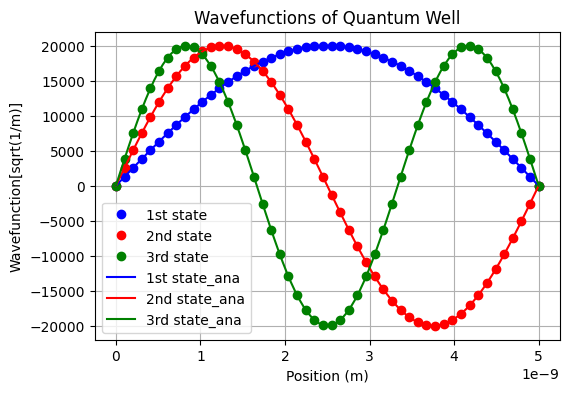

En_num1:0.079eV, En_num2:0.316eV, En_num3:0.710eV
En_ana1:0.079eV, En_ana2:0.317eV, En_ana3:0.712eV


In [18]:
from constant import q,m0,kB,k,epsilon_si,epsilon_ox,epsilon0,nint,T,kT,h,hbar,m
import numpy as np, matplotlib.pyplot as plt
from scipy.linalg import eigh

a=5*1e-9
N=50
N1=N-2
dx=a/(N-1)
A=np.zeros((N1,N1))
for i in range(N1):
    if i==0 :
        A[i,i  ]=-2; A[i,i+1]= 1
    elif i==N1-1: 
        A[i,i-1]= 1; A[i,i  ]=-2
    else : 
        A[i,i-1]= 1; A[i,i  ]=-2; A[i,i+1]=1

E, psi=eigh(-hbar**2/(2*m*q)*A/dx**2)
#print(E)

x=np.linspace(0,a,N)
wavefunctions = np.zeros((N, psi.shape[1]))
wavefunctions[1:-1, :] = psi
#E 에너지 레벨들의 배열(shape=(N-2, ))
#psi 에너지 레벨에 대응하는 파동함수들의 배열(shape=(N-2,N-2))
#E[0] 제일 낮은 에너지 상태의 에너지
#psi[:,0] 제일 낮은 에너지 상태에 해당하는 파동함수를 의미
#psi.shape[0] 파동함수를 표현하기 위해 필요한 격자 포인트 수(N-2)
#psi.shape[1] 에너지 상태(state) 수(N-2)
#print(wavefunctions)

# Numerical wavefunction normalization processing
for n in range(wavefunctions.shape[1]):
    norm = np.sqrt(np.sum(wavefunctions[:, n]**2) * dx)
    wavefunctions[:, n] /= norm

### Numerical solution
plt.figure(figsize=(6,4))
plt.plot(x, wavefunctions[:, 0], 'bo', label='1st state')
plt.plot(x, wavefunctions[:, 1], 'ro', label='2nd state')
plt.plot(x, -wavefunctions[:, 2], 'go', label='3rd state')

### Analytical solution
x_ana = np.linspace(0, a, 100)
psi_ana1= np.sqrt(2 / a) * np.sin(1 * x_ana* np.pi / a)
psi_ana2= np.sqrt(2 / a) * np.sin(2 * x_ana* np.pi / a)
psi_ana3= np.sqrt(2 / a) * np.sin(3 * x_ana* np.pi / a)

plt.plot(x_ana, psi_ana1, 'b', label='1st state_ana')
plt.plot(x_ana, psi_ana2, 'r', label='2nd state_ana')
plt.plot(x_ana, psi_ana3, 'g', label='3rd state_ana')

plt.xlabel('Position (m)'), plt.ylabel('Wavefunction[sqrt(1/m)]'), plt.title('Wavefunctions of Quantum Well')
plt.legend(), plt.grid()
plt.show()

print(f"En_num1:{E[0]:0.3f}eV, En_num2:{E[1]:0.3f}eV, En_num3:{E[2]:0.3f}eV")
En_ana1=hbar**2/(2*m*q)*(1*np.pi/a)**2
En_ana2=hbar**2/(2*m*q)*(2*np.pi/a)**2
En_ana3=hbar**2/(2*m*q)*(3*np.pi/a)**2
print(f"En_ana1:{En_ana1:.3f}eV, En_ana2:{En_ana2:.3f}eV, En_ana3:{En_ana3:.3f}eV")

In [7]:
from scipy.linalg import *
from numpy import array

A = array([[2, 1, 3],[1, 1, 1],[1, 2, 1]])
b = array([1, 2, 3])

x = solve(A, b)

print(x)

[ 3.  1. -2.]


In [8]:
from constant import q,m0,kB,k,epsilon_si,epsilon_ox,epsilon0,nint,T,kT,h,hbar,m
import numpy as np, matplotlib.pyplot as plt
from scipy.linalg import eigh

N=5
A = np.zeros((N, N))
print(A)
np.fill_diagonal(A, -2)
print(A)
for i in range(N-1):
    A[i, i + 1] = 1
    A[i + 1, i] = 1

print(A)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[-2.  0.  0.  0.  0.]
 [ 0. -2.  0.  0.  0.]
 [ 0.  0. -2.  0.  0.]
 [ 0.  0.  0. -2.  0.]
 [ 0.  0.  0.  0. -2.]]
[[-2.  1.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  1. -2.]]


In [ ]:
A = np.zeros((5, 5))
np.fill_diagonal(A, -2)
for i in range(N_inner - 1):
    A[i, i + 1] = 1
    A[i + 1, i] = 1
#print(A)

In [9]:
#바로 파이썬의 내장 함수인 enumerate()를 이용하면 되는데요. for 문의 in 뒷 부분을 enumerate() 함수로 한 번 감싸주기만 하면 됩니다.
for entry in enumerate(['A', 'B', 'C']): 
    print(entry)
    #enumerate() 함수는 기본적으로 인덱스와 원소로 이루어진 튜플(tuple)을 만들어줍니다. 
    #따라서 인덱스와 원소를 각각 다른 변수에 할당하고 싶다면 인자 풀기(unpacking)를 해줘야 합니다.

(0, 'A')
(1, 'B')
(2, 'C')


In [29]:
#N=["a","b","c","d","e"]
#for i in enumerate(N): 
#    print(i)

A = np.zeros(5)
print(A)
for i in enumerate(A): 
    print(i)

[0. 0. 0. 0. 0.]
(0, np.float64(0.0))
(1, np.float64(0.0))
(2, np.float64(0.0))
(3, np.float64(0.0))
(4, np.float64(0.0))


In [32]:

A = np.linspace(1,6,5)
print(A)
for i in enumerate(A): 
    print(i)

[1.   2.25 3.5  4.75 6.  ]
(0, np.float64(1.0))
(1, np.float64(2.25))
(2, np.float64(3.5))
(3, np.float64(4.75))
(4, np.float64(6.0))


[[  1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [ 11.7 -23.4  11.7   0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.   11.7 -23.4  11.7   0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.   11.7 -23.4  11.7   0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.   11.7 -23.4  11.7   0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.   11.7 -15.6   3.9   0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    3.9  -7.8   3.9   0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    3.9  -7.8   3.9   0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    3.9  -7.8   3.9   0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    3.9  -7.8   3.9]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1. ]]
[[2.27738056e-16]
 [5.00000000e-02]
 [1.00000000e-01]
 [1.50000000e-01]
 [2.00000000e-01]
 [2.50000000e-01]
 [4.00000000e-01]
 [5.50000000e-01]
 [7.00000000e-01]
 [8.50000000e-01]
 [1.00000000e+00]]
Index 0: Value 2.2773805633336547e-16
Ind

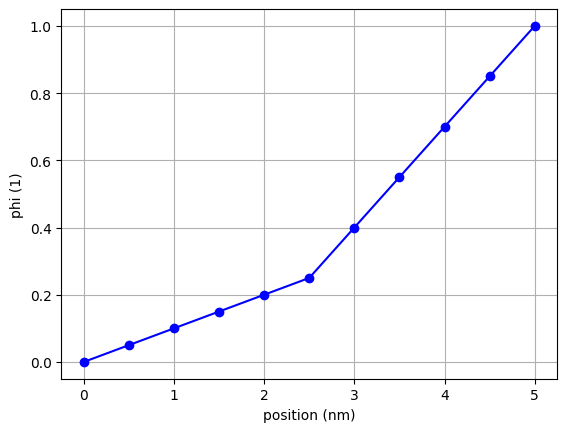

In [9]:
import numpy as np
import matplotlib.pyplot as plt

a, e1, e2= 5, 11.7, 3.9 # 왜 N이 홀수면 이상해 지는가?
N=10
dx=a/N
x=np.arange(N+1)*dx # 이때 N=0~10번째 자리까지
A=np.zeros((N+1,N+1))
b=np.zeros((N+1,1))
for ii in range(1,N): # 이때 N=1~9번째 자리까지이다. 따라서 초기값 [0,0],[N,N]을 넣어주어야 한다.
    A[0,0]=1 
    b[0]=0
    if dx*ii<a/2:
        A[ii,ii-1], A[ii,ii  ], A[ii,ii+1]= e1, -2*e1,  e1
    elif dx*ii==a/2:
        A[ii,ii-1], A[ii,ii  ], A[ii,ii+1]= e1, -e2-e1, e2
    elif dx*ii>a/2:
        A[ii,ii-1], A[ii,ii  ], A[ii,ii+1]= e2, -2*e2,  e2
    A[N,N]=1
    b[N]=1 #potenital=1
    #print(A)

#print(b)
print(A)
#print(b)
phi=np.linalg.solve(A,b)
print(phi)
for idx, value in enumerate(phi):
    print(f"Index {idx}: Value {value[0]}")

plt.plot(x,phi,'bo-')
plt.xlabel('position (nm)')
plt.ylabel('phi (1)')
plt.grid()
plt.show()


In [78]:
N=5
x=np.arange(N)
print(x)
x=np.arange(0,N,1)
print(x)
x=np.arange(1,N)
print(x)
x=np.arange(2,N)
print(x)

for i in range(0,N):
    y=[i]
    print("y1=",y)
for i in range(1,N):
    y=[i]
    print("y2=",y)
for i in range(2,N):
    y=[i]
    print("y3=",y)
z=np.zeros(N)
print(z)
z=np.zeros(N+1)
print(z)
x=np.linspace(0,4,N)
print(x)

[0 1 2 3 4]
[0 1 2 3 4]
[1 2 3 4]
[2 3 4]
y1= [0]
y1= [1]
y1= [2]
y1= [3]
y1= [4]
y2= [1]
y2= [2]
y2= [3]
y2= [4]
y3= [2]
y3= [3]
y3= [4]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 1. 2. 3. 4.]


In [73]:
a=1
N=5
dx=a/N
print(dx)
x=np.arange(N+1)*dx
print(x)

0.2
[0.  0.2 0.4 0.6 0.8 1. ]


In [86]:
import numpy as np
N=4 # N=50에서, 처음과 마지막은 제외
A=np.zeros((N,N)) # 0행렬
print(A)
diagonal=np.fill_diagonal(A,-2) #대각 -2
print(diagonal)
for ii in range(0,N-1): # ii가 0에서 N-2까지 변하면서(range 명령은 N-1미만 )
    A[ii,ii+1]=1 #대각에서 오른쪽 한칸 이동한 성분을 1로 만든다.
    A[ii+1,ii]=1 #대각에서 왼쪽 한칸 이동한 성분을 1로 만든다.
D,V=np.linalg.eig(A)
print(A)
print(D)
print(V)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
None
[[-2.  1.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 0.  1. -2.  1.]
 [ 0.  0.  1. -2.]]
[-3.61803399 -2.61803399 -0.38196601 -1.38196601]
[[ 0.37174803  0.60150096 -0.37174803 -0.60150096]
 [-0.60150096 -0.37174803 -0.60150096 -0.37174803]
 [ 0.60150096 -0.37174803 -0.60150096  0.37174803]
 [-0.37174803  0.60150096 -0.37174803  0.60150096]]


In [75]:
print(A)

[[-2.  1.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  1. -2.]]


In [89]:
x=("a","b","c","d")
t=np.array(x)
print(t)

['a' 'b' 'c' 'd']


In [93]:
x=[4,5,3,6]
t=np.arange(x-1)
print(t)

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [94]:
import numpy as np

x = np.array([4, 5, 3, 6])
x - 1    # ✅ 가능! → [3 4 2 5]


array([3, 4, 2, 5])